#Deep Learning Foundations with MNIST


### Import Libraries


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

### Load and Preprocess the MNIST Dataset


11490434/11490434 [==============================] - 0s 0us/step


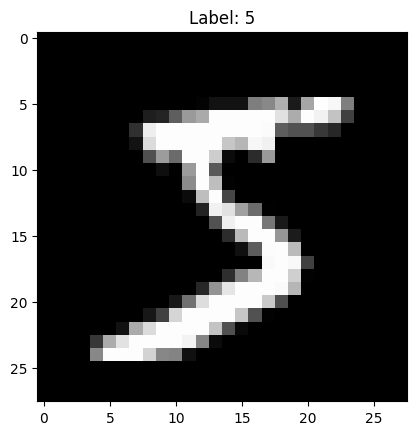

In [2]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Display the first image
plt.imshow(train_images[0], cmap='gray')
plt.title("Label: {}".format(np.argmax(train_labels[0])))
plt.show()

### Build the Neural Network Model
1. Layers and Activation Functions
Here, we'll use `Dense` layers (fully connected layers) and the ReLU activation function for the hidden layers. The output layer will use the `Softmax` activation function, which is commonly used for multi-class classification tasks.

In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D array
    Dense(128, activation='relu'),  # Hidden layer with 128 units and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 units (for 10 classes) and Softmax activation
])

2. Loss Function and Optimization Technique
For multi-class classification, the commonly used loss function is the `categorical_crossentropy`. We'll use the `Adam` optimizer, which is an extension of stochastic gradient descent and is quite effective in practice.

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Train the Model


In [5]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2580 - accuracy: 0.9265 - val_loss: 0.1324 - val_accuracy: 0.9587
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1158 - accuracy: 0.9661 - val_loss: 0.0968 - val_accuracy: 0.9724
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0774 - accuracy: 0.9771 - val_loss: 0.1049 - val_accuracy: 0.9662
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0577 - accuracy: 0.9831 - val_loss: 0.0779 - val_accuracy: 0.9773
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0437 - accuracy: 0.9866 - val_loss: 0.0744 - val_accuracy: 0.9777


### Evaluate the Model's Performance


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 0s - loss: 0.0744 - accuracy: 0.9777 - 368ms/epoch - 1ms/step

Test accuracy: 0.9776999950408936
